##Spam Classification using NLTK and scikit-learn


1. Load and clean Enron spam e-mails text
2. Generate stopwords list
3. Set up pipelines for a Multinomial Naive Bayes model and a LinearSVM model
4. Use k-fold cross validation to compare classification model results


Multinomial Naive Bayes counts occurences and is suitable for datasets with discrete features while SVM models are good for linearly separable datasets with many features (such as text), making the two models a good choice for spam classification problems.

A k-fold cross validation method was chosen for facilitating the training/test set splits. In k-fold cross validation, the data is partitioned into k subsets. Each set is held for validation while the other k-1 sets are used for training. Average error across all trials is then calculated.

Each model pipeline was tuned experimenting with different n-gram counts and tf-idf weighting. The best results are shown.

In [1]:
import pandas as pd
import numpy as np
import string
import itertools
from nltk.corpus import stopwords  
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer       
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.cross_validation import KFold
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt

In [2]:
# load dataset with e-mail text and a spam/not spam binary indicator 
emails = pd.read_csv("C:/Users/Julie/Desktop/BAPM/Online Learning Materials/Python/emails.csv",usecols=[0,1])

# remove punctuation
emails['cleaned'] = emails['text'].apply(lambda x:''.join([i for i in x 
                                                  if i not in string.punctuation]))
emails['cleaned'][:10]

0    Subject                       forwarded by vin...
1    Subject    direct marketing will increase sale...
2    Subject   http    www  virtu  ally  anywhere  ...
3    Subject  gorgeous  custom websites   399 compl...
4    Subject   content  type  text  plain  charset ...
5    Subject  enron day  to be declared in spearman...
6    Subject  help millions   pledge today   thank ...
7    Subject  henwood  s rationalizing midwest powe...
8    Subject  we are one  enron  com    final notic...
9    Subject           guaranteed  50  000 fast    ...
Name: cleaned, dtype: object

In [5]:
# stopword list to use
stopwords_list = stopwords.words('english')
stopwords_list.append('subject') # add 'subject' to stopwords list

stopwords_list[-10:]

[u'mightn',
 u'mustn',
 u'needn',
 u'shan',
 u'shouldn',
 u'wasn',
 u'weren',
 u'won',
 u'wouldn',
 'subject']

In [3]:
# set up function to be used to print confusion matrix
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


## Naive Bayes Classifier

Total documents classified: 5726
Score: 0.95857454499


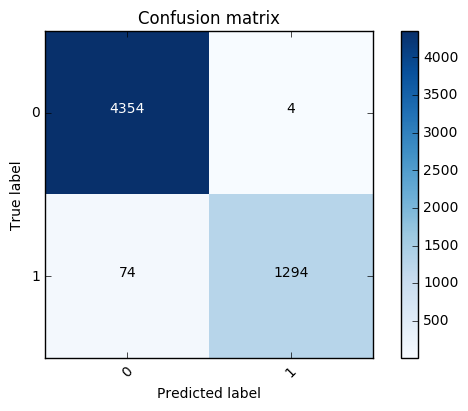

In [6]:
# set up pipeline for Naive Bayes Classifier

pipeline1 = Pipeline([
    ('count_vectorizer', CountVectorizer(ngram_range=(1, 2), #tokenizes words from unigram up to bigrams
                                         lowercase = True, #convert text to lowercase
                                         stop_words = stopwords_list)), #remove stopwords
    ('classifier', MultinomialNB())
])

#10 fold cross validation
k_fold = KFold(n=len(emails), n_folds=10)
scores = []
confusion = np.array([[0, 0], [0, 0]])

for train_indices, test_indices in k_fold:
    train_text = emails.iloc[train_indices]['cleaned'].values
    train_y = emails.iloc[train_indices]['spam'].values

    test_text = emails.iloc[test_indices]['cleaned'].values
    test_y = emails.iloc[test_indices]['spam'].values

    #fit the model
    pipeline1.fit(train_text, train_y)
    predicted = pipeline1.predict(test_text)

    confusion += confusion_matrix(test_y, predicted)
    score = f1_score(test_y, predicted)
    scores.append(score)

print 'Total documents classified:', len(emails)
print 'Score:', sum(scores)/len(scores)

# plot confusion matrix
plt.figure()
plot_confusion_matrix(confusion, classes=[0,1],
                      title='Confusion matrix')

plt.show()

## Linear SVC Classifier

Total documents classified: 5726
Score: 0.971238559526


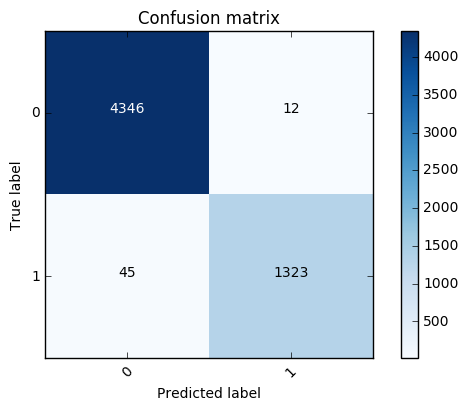

In [7]:
#set up LinearSVC pipeline

pipeline2 = Pipeline([
    ('count_vectorizer', CountVectorizer( lowercase = True, #convert text to lowercase
                                          stop_words = stopwords_list)), #remove stopwords
    ('tfidf_transformer',  TfidfTransformer()), #weighs terms by importance to help with feature selection
    ('classifier', LinearSVC())
])

k_fold = KFold(n=len(emails), n_folds=10)
scores = []
confusion = np.array([[0, 0], [0, 0]])

for train_indices, test_indices in k_fold:
    train_text = emails.iloc[train_indices]['cleaned'].values
    train_y = emails.iloc[train_indices]['spam'].values

    test_text = emails.iloc[test_indices]['cleaned'].values
    test_y = emails.iloc[test_indices]['spam'].values

    pipeline2.fit(train_text, train_y)
    predicted = pipeline2.predict(test_text)

    confusion += confusion_matrix(test_y, predicted)
    score = f1_score(test_y, predicted)
    scores.append(score)

print 'Total documents classified:', len(emails)
print 'Score:', sum(scores)/len(scores)

# plot confusion matrix
plt.figure()
plot_confusion_matrix(confusion, classes=[0,1],
                      title='Confusion matrix')

plt.show()

Both models return fairly good results, with the LinearSVM model classifying 97.1% of e-mails correctly. In spam classification, it is important to minimize **false positives** so that legitimate e-mails are not classified as spam. With respect to false positives, the Multinomial Naive Bayes model demonstrates better performance with only 4 false positives and a score of 95.8% e-mails classified correctly.



References:  
http://zacstewart.com/2015/04/28/document-classification-with-scikit-learn.html  
http://blog.manugarri.com/sentiment-analysis-in-spanish/   
http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html 